![codebasics - Converting words to numbers, Word Embeddings Deep Learning Tutorial 39 (Tensorflow & Python) [sZGuyTLjsco - 756x425 - 11m07s].png](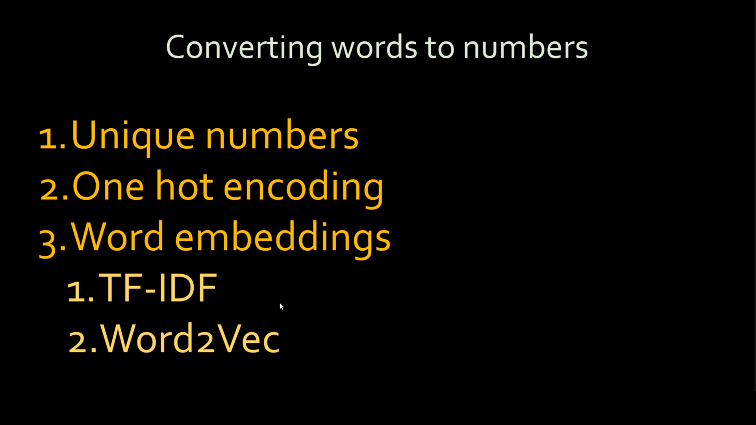)

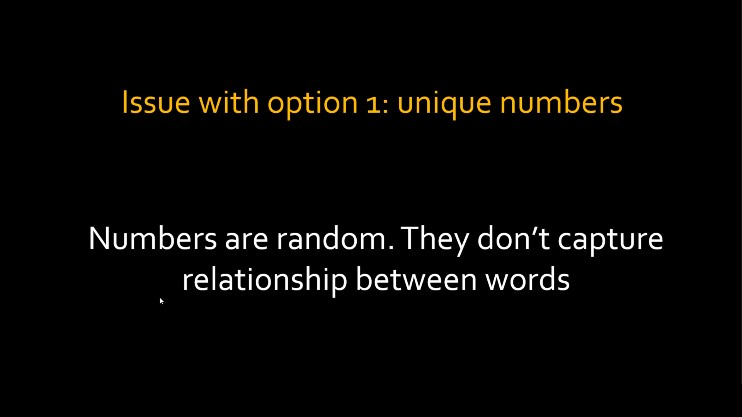

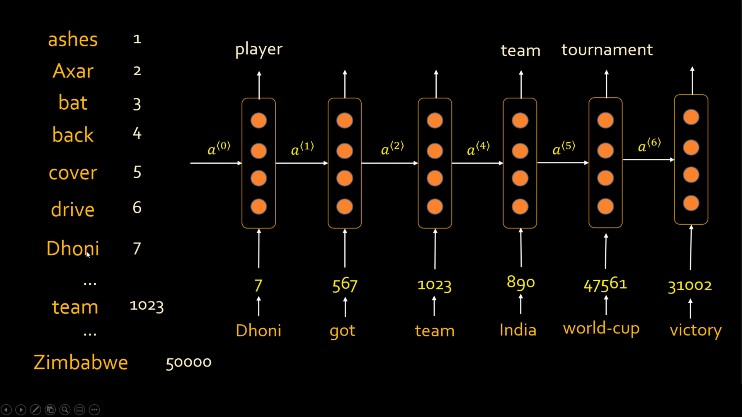

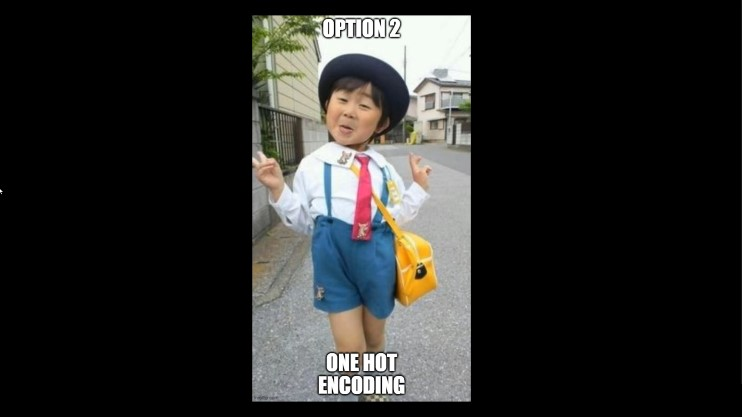

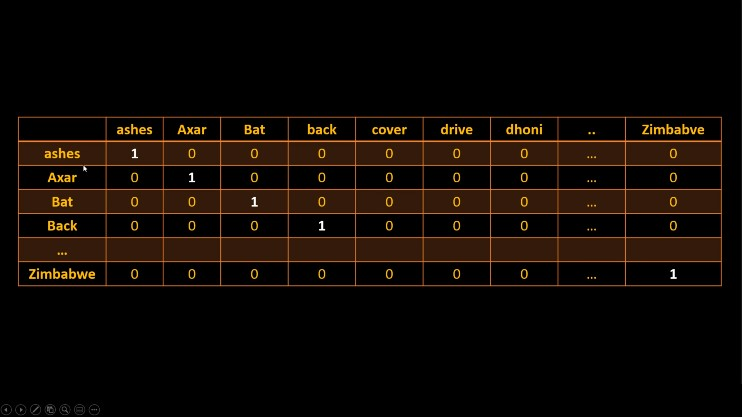

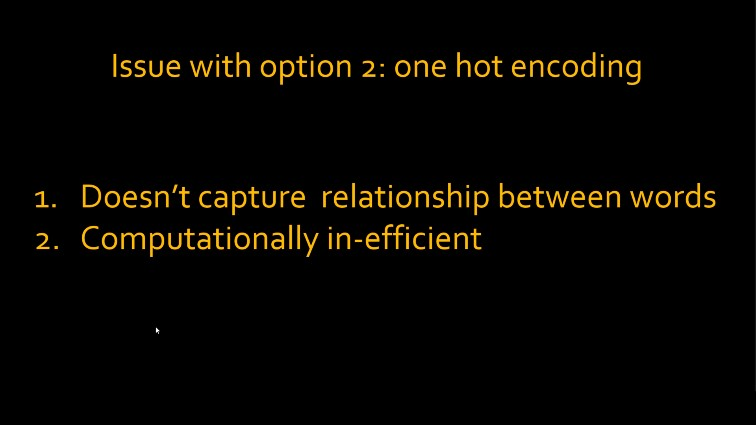

**Option 3 : Word Embedding : Based on certain features, assigning values to each features of the word**

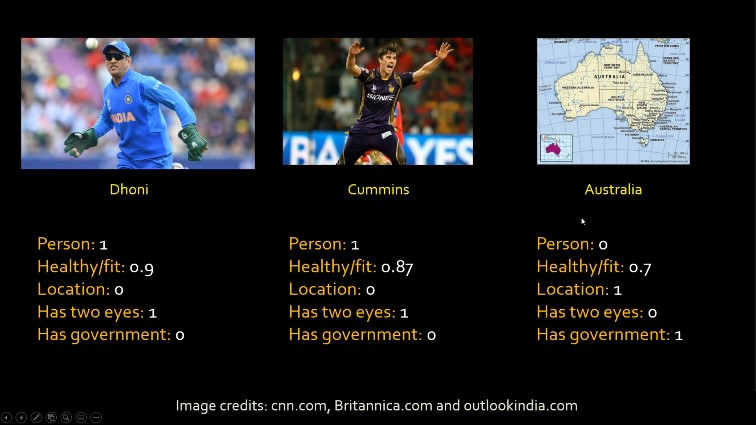

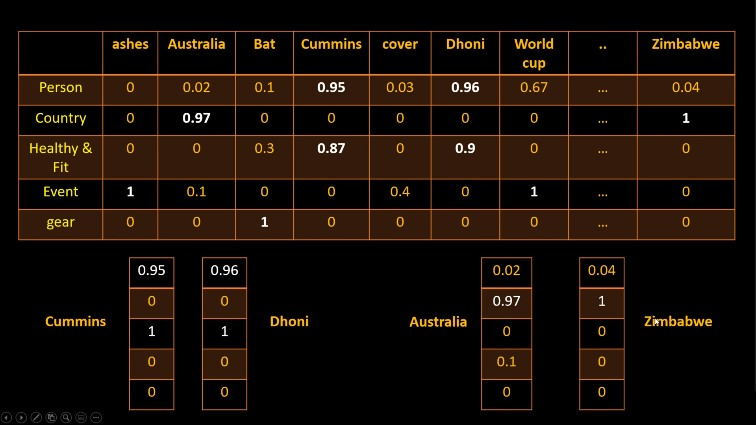

# WORD EMBEDDING ARE THE BEST TECHNIQUES ⁉
Embedding  = representing the words in terms of vectors, which can represent the meaning of the word

![codebasics - Word embedding using keras embedding layer Deep Learning Tutorial 40 (Tensorflow, Keras & Python) [Fuw0wv3X-0o - 762x429 - 1m53s].png](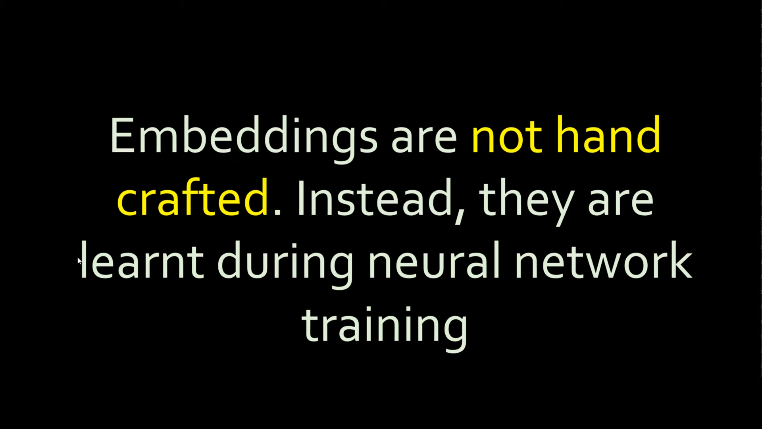)

![codebasics - Word embedding using keras embedding layer Deep Learning Tutorial 40 (Tensorflow, Keras & Python) [Fuw0wv3X-0o - 762x429 - 2m05s].png](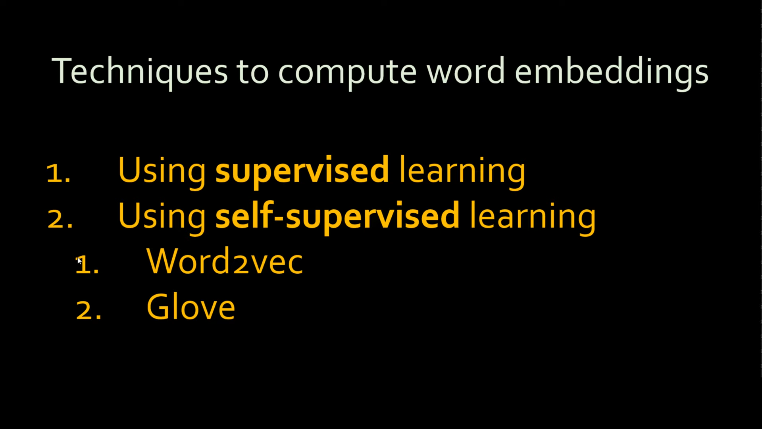)

![codebasics - Word embedding using keras embedding layer Deep Learning Tutorial 40 (Tensorflow, Keras & Python) [Fuw0wv3X-0o - 762x429 - 2m09s].png](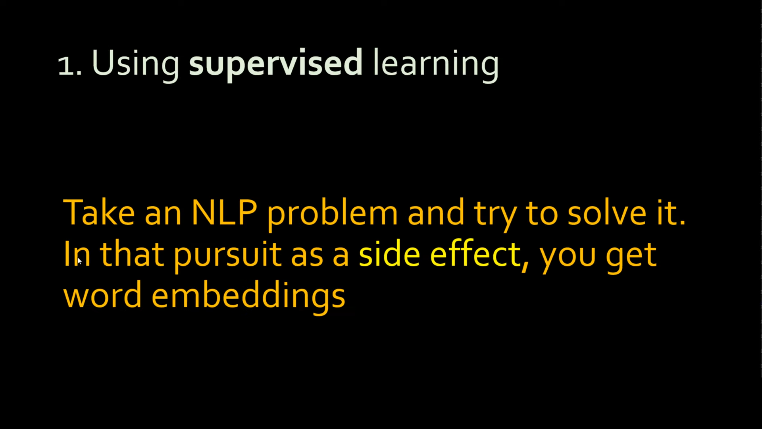)

Assuming 4 dimensional embedding vectors for each variables(features, assume only 2 right now for example)

Your goal is to compute 4*5000 ebedded matrix

1st step one hot encoding matrix.

2nd step come up with ramdom weights in embadding matrix.

3rd step, by matrix multiplication of one hot enode matrix(of a feature, for all features) with full 4*5000 vali embedded matrix to get a vector(column). Then flatten the vector to get one 8 dimensional vector(if there are only 2 features).

4th then feed this vector to sigmoid function(assume like single neuron sigmoid function) to get y_predicted, compare it with y_truth; get loss and backpropagate this loss using gradient descent, ultimately as a result this weights will be updated.

5th repeat the same things : new embedded matrix, new multiplications of one hot encode column with full new matrix. Get full flatten column matrix. Compare with true values, then compute loss and again using backpropagation, update the weights.

![codebasics - Word embedding using keras embedding layer Deep Learning Tutorial 40 (Tensorflow, Keras & Python) [Fuw0wv3X-0o - 762x429 - 4m18s].png](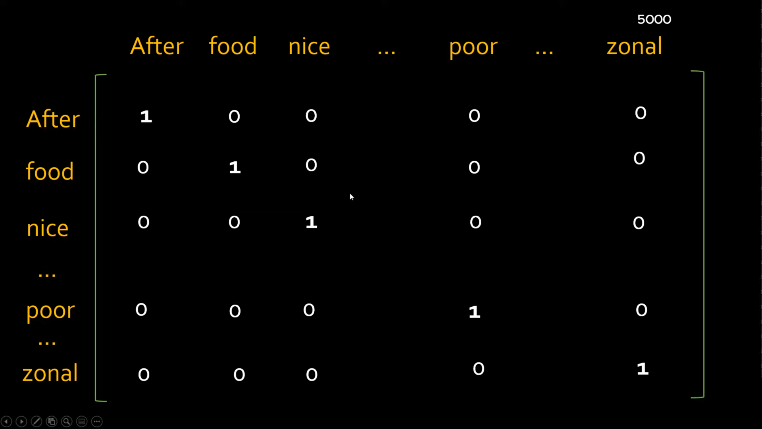)

![codebasics - Word embedding using keras embedding layer Deep Learning Tutorial 40 (Tensorflow, Keras & Python) [Fuw0wv3X-0o - 762x429 - 6m42s].png](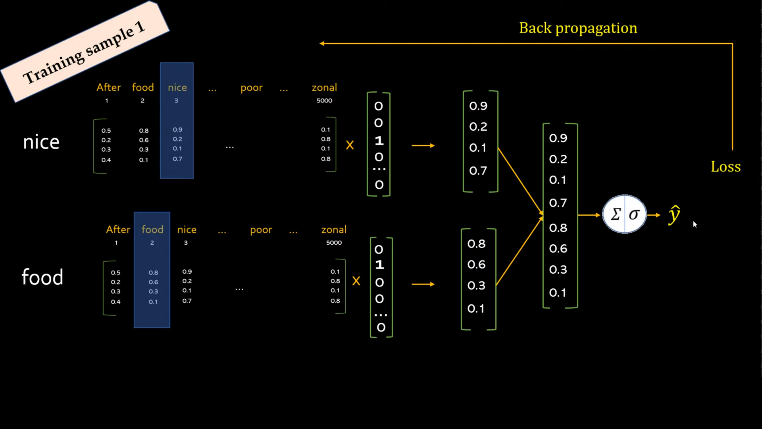)

![codebasics - Word embedding using keras embedding layer Deep Learning Tutorial 40 (Tensorflow, Keras & Python) [Fuw0wv3X-0o - 762x429 - 6m54s].png](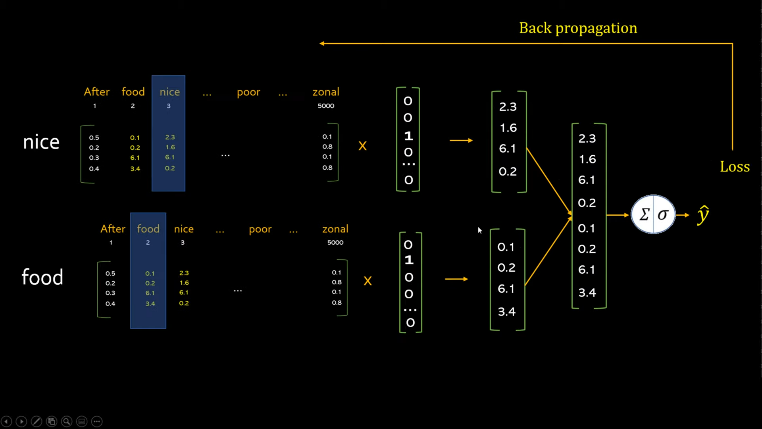)

Embedded matrix will keep on changing until most accurate weights for models

![codebasics - Word embedding using keras embedding layer Deep Learning Tutorial 40 (Tensorflow, Keras & Python) [Fuw0wv3X-0o - 762x429 - 7m52s].png](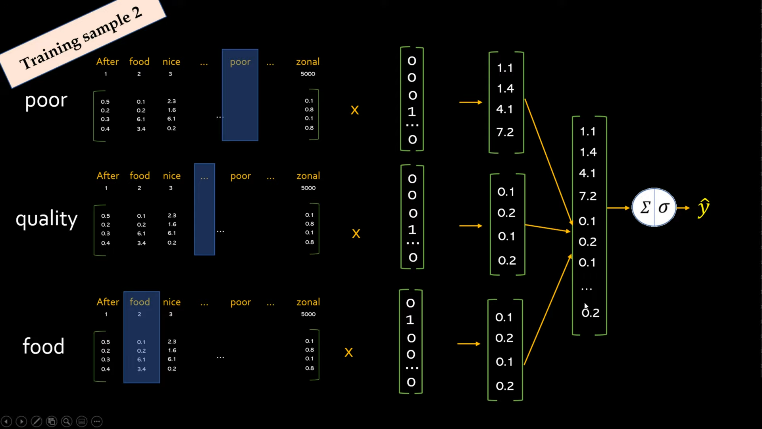)

You take the maximum sentence size and you do padding for the remaining words : all one hot encode is 0,0,0,0,0,0,   ,0 (no 1)


![codebasics - Word embedding using keras embedding layer Deep Learning Tutorial 40 (Tensorflow, Keras & Python) [Fuw0wv3X-0o - 762x429 - 8m23s] (1).png](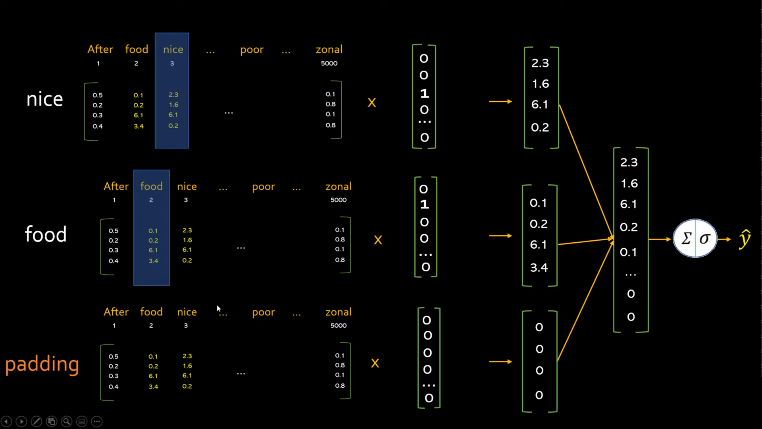)

Eventually come up with embedding matrix, that can represent the words nicely

![codebasics - Word embedding using keras embedding layer Deep Learning Tutorial 40 (Tensorflow, Keras & Python) [Fuw0wv3X-0o - 762x429 - 9m10s].png](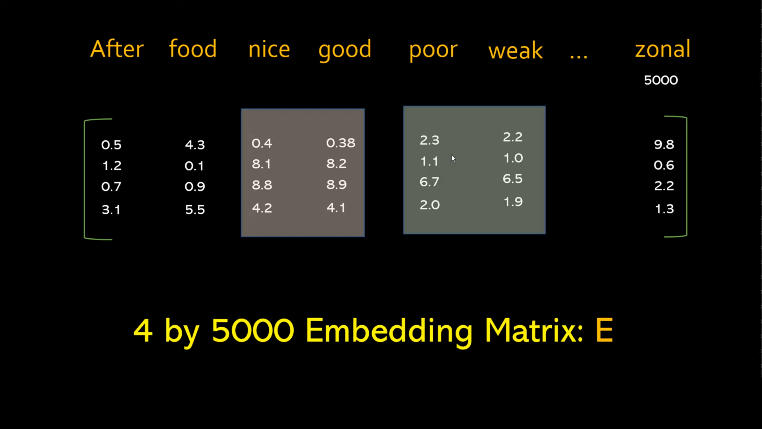)

This approach is supervised learning of word encodding. This approach is not very popular now a days. Word2vec is more popular.

# Pyhton code for supervised learning technique for embedding

Food Review Classification

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding

In [ ]:
reviews = [
    'nice food',
    'amazing restraunt',
    'too good',
    'just loved it',
    'will go again',
    'horrible food',
    'never go there',
    'poor service',
    'poor quality',
    'needs improvement'
]

sentiment = np.array([1,1,1,1,1,0,0,0,0,0])

In [ ]:
one_hot("amazing restraunt", 500) # each word of the sentence will be assigned a unique number. That numbers will be less than 500

[476, 398]

In [ ]:
# all reviews ko one-hot encoded vectors me badlna
vocab_size = 30
encoded_reviews = [one_hot(d, vocab_size) for d in reviews]
encoded_reviews

[[29, 1],
 [23, 5],
 [11, 12],
 [14, 22, 10],
 [2, 4, 6],
 [1, 1],
 [11, 4, 17],
 [8, 5],
 [8, 27],
 [6, 13]]

The str.split() function in Python and its equivalent in JavaScript (e.g., str.split(' ')) is used to split a string into a list or array of substrings based on a specified delimiter.

In [ ]:
str = "aman is a good boy"
word_list = str.split() # by default space delimiter pr this string will be splitted into new substrings of the resultant list
print(word_list)

['aman', 'is', 'a', 'good', 'boy']


# kisi anya delimiter pr string ko split krna ho to

In Python, if you want to change the delimiter for the `split()` function from the default space delimiter, you can pass the desired delimiter as an argument to the `split()` method. Here's an example:

```python
# Example with a custom delimiter in Python
sentence = "apple,orange,banana"
fruits_list = sentence.split(',')
print(fruits_list)
```

Output:
```
['apple', 'orange', 'banana']
```

In this example, the `split(',')` method is used, which splits the `sentence` string into a list of substrings based on commas.

You can use any character or string as the delimiter, depending on your specific use case. If you want to split based on multiple characters or a sequence, you can pass that sequence as the argument to the `split()` method. For example:

```python
# Example with a custom delimiter in Python
data = "John||Doe||25||Male"
info_list = data.split('||')
print(info_list)
```

Output:
```
['John', 'Doe', '25', 'Male']
```

In this example, the string is split using the custom delimiter '||'.

In [ ]:
# padding upto max sentences size.Chote length vale sentences ke end me 0,0,0 add kr do until sentence length becomes equal to max length

# Find the maximum word count
max_word_count = max(len(str.split()) for str in reviews)

padded_reviews = pad_sequences(encoded_reviews, maxlen=max_word_count, padding='post')

print(padded_reviews)


[[29  1  0]
 [23  5  0]
 [11 12  0]
 [14 22 10]
 [ 2  4  6]
 [ 1  1  0]
 [11  4 17]
 [ 8  5  0]
 [ 8 27  0]
 [ 6 13  0]]


In [ ]:
# next step : embadded vector size :

embedded_vector_size = 4 # to match with presentation.
# this is the number of features we want to take in use to find correlation among features and assign relevant weights to them for each samples to get correct model.

# model me layers add krne ka another way

model = Sequential()
model.add(Embedding(vocab_size, embedded_vector_size, input_length=max_word_count, name = 'embedding'))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))

In [ ]:
X = padded_reviews
Y = sentiment

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

**model compile krke hmne model train toh kr liya, but this is just a bahana, actual cheejen to weights find krna hai, jo ki model ke train hone se autometically we will get.**

As a side effects we will get word embedding

**Almost like a fake model. We don't care about the model. We just case about the word embedding**

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 4)              120       
                                                                 
 flatten_1 (Flatten)         (None, 12)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 133 (532.00 Byte)
Trainable params: 133 (532.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X,Y, epochs = 50, verbose=0)

In [ ]:
# evaluate our small model

loss, accuracy = model.evaluate(X,Y)
accuracy

1/1 [==============================] - 0s 105ms/step - loss: 0.6427 - accuracy: 1.0000


1.0

As Expected

Sentiment classification is a fake problem, I am more interested in word embedding

By solving the sentiment classification problem, we have got our word embeddings.

Word embeddings are nothing but those parameteres in your neural network.



In [ ]:
model.get_layer('embedding').get_weights()[0]

array([[ 0.07551674,  0.0688499 , -0.05216036, -0.00458765],
       [ 0.01922701, -0.01383244, -0.06593652, -0.07597689],
       [-0.09251402,  0.00899033,  0.03164344,  0.00548315],
       [-0.01962144,  0.04675991, -0.03460441,  0.03481848],
       [ 0.01785967, -0.06489733,  0.00242518,  0.02026053],
       [ 0.04537036,  0.00332695, -0.07933211, -0.01540774],
       [ 0.08800295, -0.05974412,  0.02065475,  0.01244324],
       [-0.03221784, -0.00655393,  0.0223405 ,  0.01747089],
       [ 0.00558179, -0.04614886, -0.05331143, -0.00766393],
       [-0.0310841 , -0.0402249 ,  0.02745816,  0.01370562],
       [-0.09897534, -0.0421072 ,  0.03995332,  0.05254582],
       [-0.05849389,  0.0127378 , -0.00790499, -0.0312033 ],
       [ 0.01601728,  0.09943701, -0.05853251, -0.07733101],
       [-0.069879  , -0.02100223,  0.01725221,  0.09417897],
       [-0.07398336,  0.06645674,  0.02007264,  0.01878389],
       [-0.0403934 ,  0.03240896, -0.01951462, -0.01376984],
       [-0.009532  ,  0.

Embedding vector (i.e.4 features ke weights in a list) for each word in the sentences.

total words = 3*10 = 30 => total 30 embedded vectors.(for all 30 words),( each vector with 4 weights)

In [ ]:
weights = model.get_layer('embedding').get_weights()[0]
len(weights)

30

In [ ]:
weights[29] # word jiska embedded rup 11 hai, ke all 4 features ke weights will be printed

array([-0.06849405,  0.06289656,  0.01324091,  0.03020148], dtype=float32)

compute and save this embedded matrix in a file. Later onwhen you want to perform different type of task, you can load save embedding from the file into the layer of model

# 2. Word2vec

king - man + woman = Queen,

this highly logical task done by computer ?? YES IT IS.

Computer will be able to tell you the answer.

our aim is to represent the word 'king' in a set of numbers such that that set represent the meaning of the number accurately.

Similarly for all the words.

![codebasics - What is Word2Vec A Simple Explanation Deep Learning Tutorial 41 (Tensorflow, Keras & Python) [hQwFeIupNP0 - 762x429 - 2m16s].png](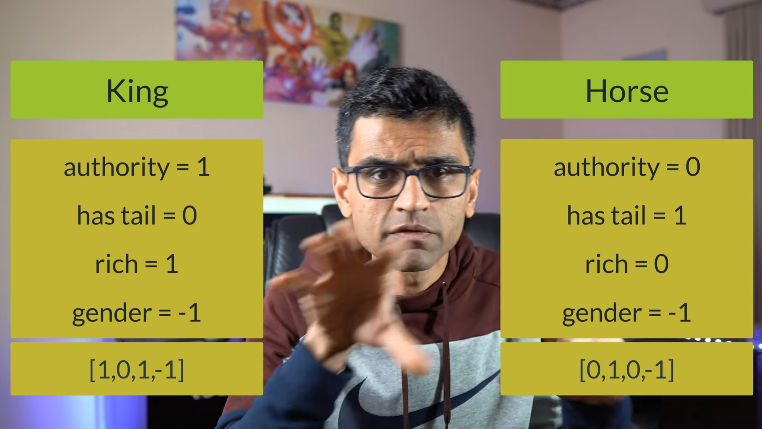)

![codebasics - What is Word2Vec A Simple Explanation Deep Learning Tutorial 41 (Tensorflow, Keras & Python) [hQwFeIupNP0 - 762x429 - 3m51s].png](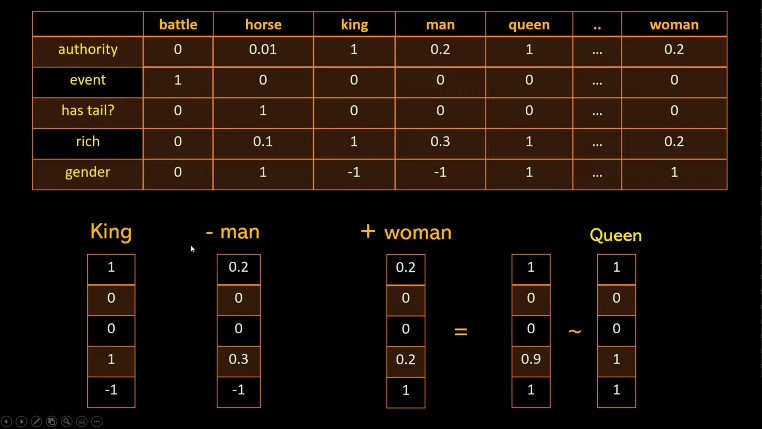)

# To come up with each of the properties manually related to chosen words is very very difficult.

![codebasics - What is Word2Vec A Simple Explanation Deep Learning Tutorial 41 (Tensorflow, Keras & Python) [hQwFeIupNP0 - 762x429 - 4m26s].png](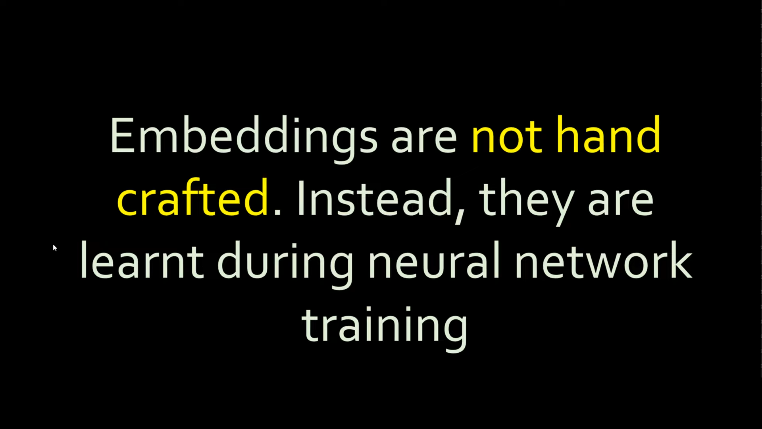)

You don't have to handcode is. Machine will learn it magically.

You take a fake problem and you will try to solve it using neural network and  as a side effect you will get word embeddings.

![codebasics - What is Word2Vec A Simple Explanation Deep Learning Tutorial 41 (Tensorflow, Keras & Python) [hQwFeIupNP0 - 762x429 - 5m23s].png](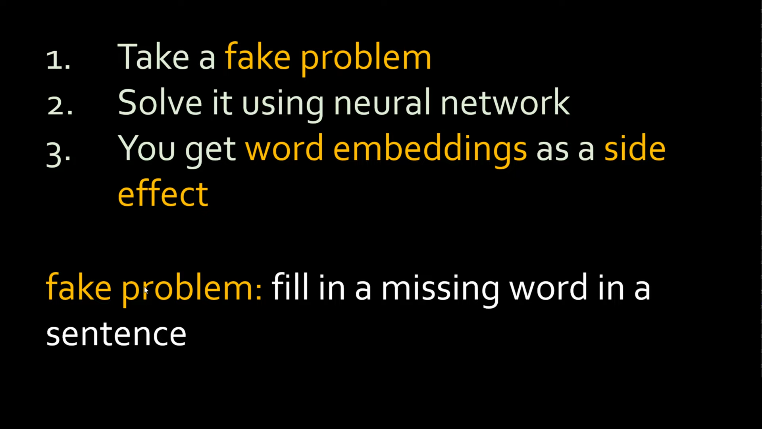)

![codebasics - What is Word2Vec A Simple Explanation Deep Learning Tutorial 41 (Tensorflow, Keras & Python) [hQwFeIupNP0 - 762x429 - 6m35s].png](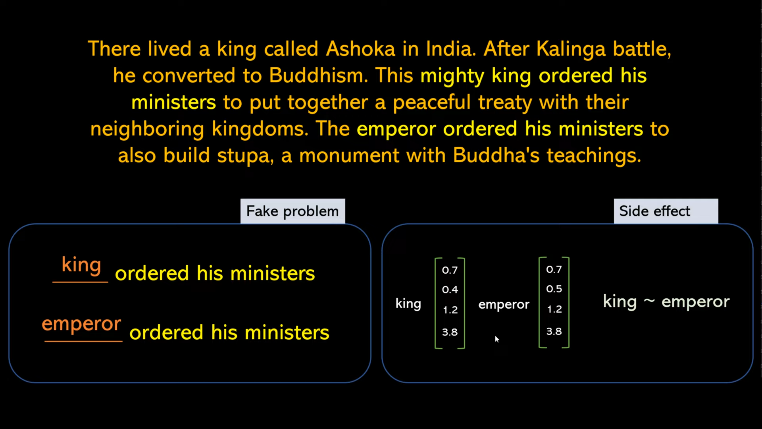)

![codebasics - What is Word2Vec A Simple Explanation Deep Learning Tutorial 41 (Tensorflow, Keras & Python) [hQwFeIupNP0 - 762x429 - 7m24s].png](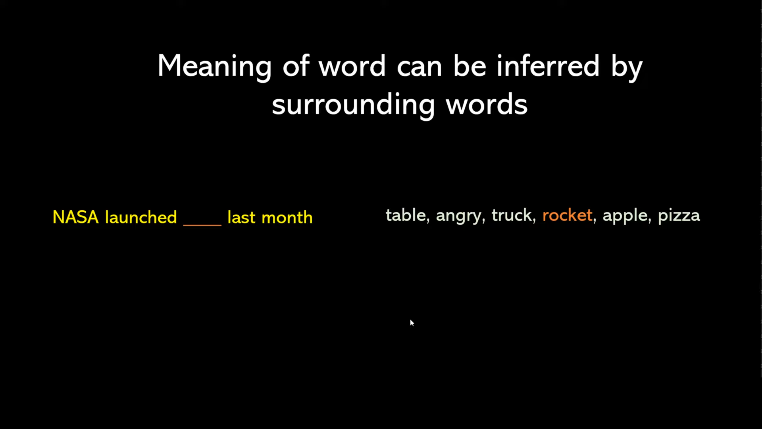)

![codebasics - What is Word2Vec A Simple Explanation Deep Learning Tutorial 41 (Tensorflow, Keras & Python) [hQwFeIupNP0 - 762x429 - 6m57s].png](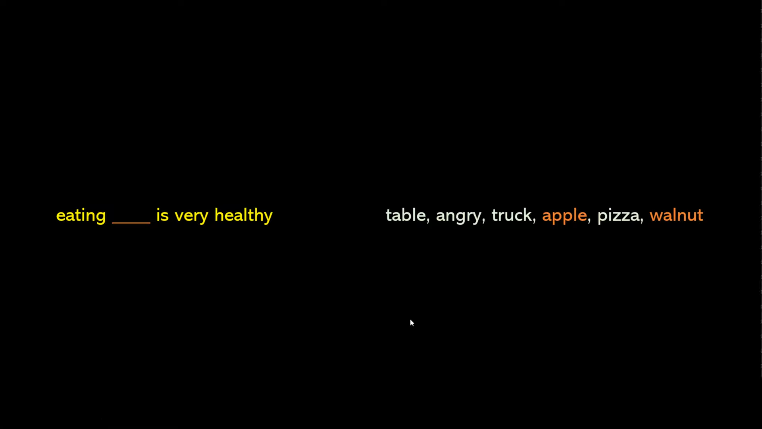)

Our aim is to find word embedding = find vector representing the meaning of the word.

Size of embedding vector = number of features/parameters on which model has to be trained. It is something trial and error.

![codebasics - What is Word2Vec A Simple Explanation Deep Learning Tutorial 41 (Tensorflow, Keras & Python) [hQwFeIupNP0 - 762x429 - 9m43s].png](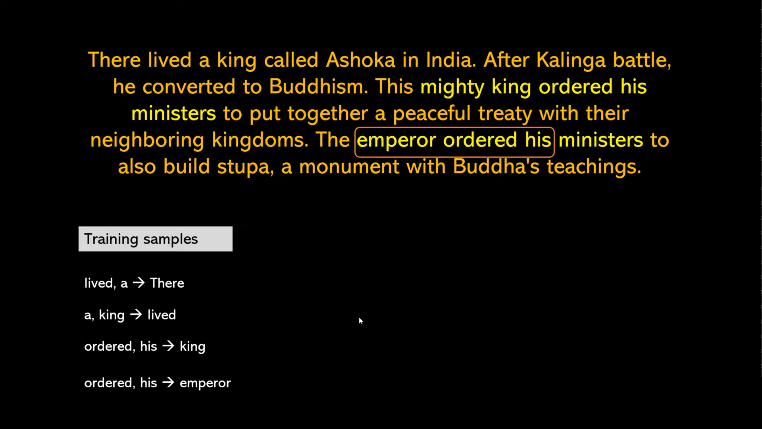)

of all three consecutive words.

you are not taking the whole sentence. You are taking window of size 3.

![codebasics - What is Word2Vec A Simple Explanation Deep Learning Tutorial 41 (Tensorflow, Keras & Python) [hQwFeIupNP0 - 762x429 - 11m48s].png](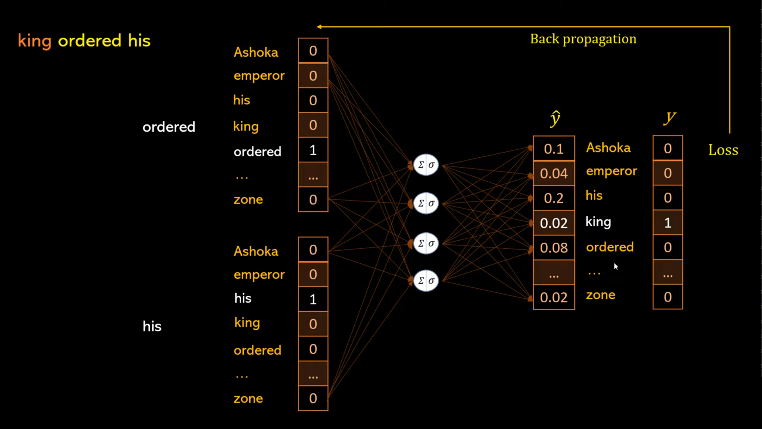)

![codebasics - What is Word2Vec A Simple Explanation Deep Learning Tutorial 41 (Tensorflow, Keras & Python) [hQwFeIupNP0 - 762x429 - 12m33s].png](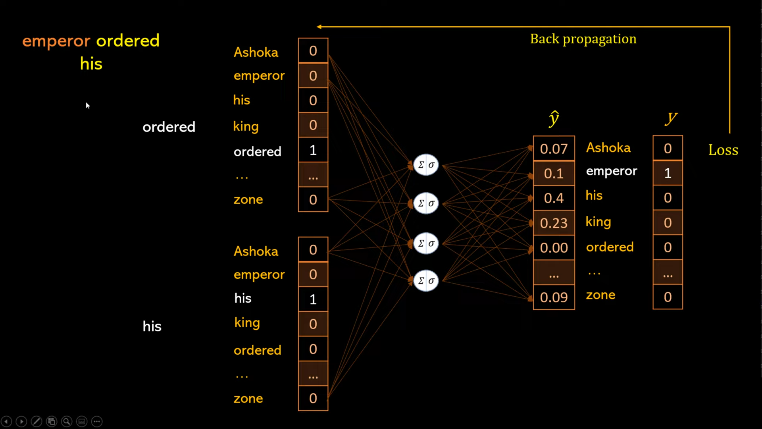)

![codebasics - What is Word2Vec A Simple Explanation Deep Learning Tutorial 41 (Tensorflow, Keras & Python) [hQwFeIupNP0 - 762x429 - 12m59s].png](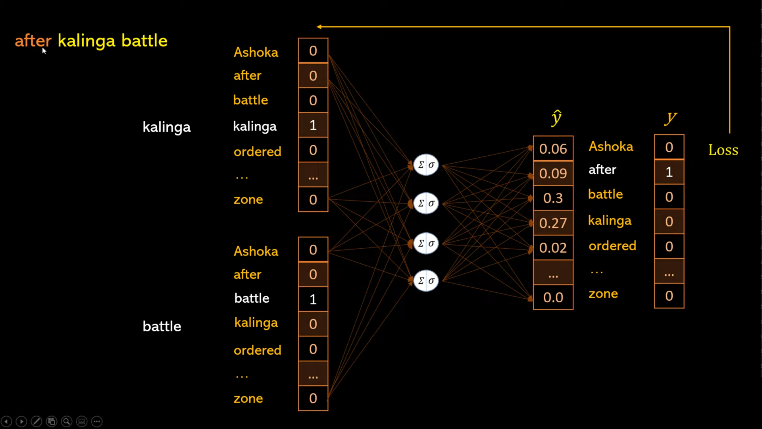)

Final weights(least losss) for each training samples.

![codebasics - What is Word2Vec A Simple Explanation Deep Learning Tutorial 41 (Tensorflow, Keras & Python) [hQwFeIupNP0 - 762x429 - 13m21s].png](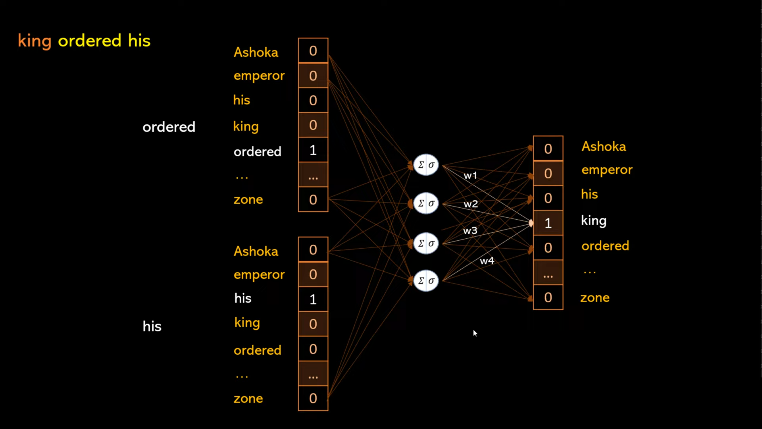)

In a perfect embedding, weights/ vectors for king and emperor will almost to be same as they mean the same.

This approach is called continuous bag of words

iska opposite will be : Skip Gram

![codebasics - What is Word2Vec A Simple Explanation Deep Learning Tutorial 41 (Tensorflow, Keras & Python) [hQwFeIupNP0 - 762x429 - 14m47s].png](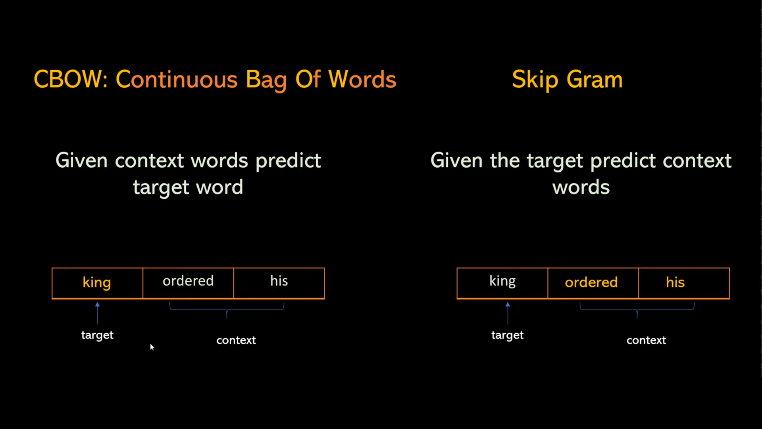)

So Word2vec is not a single technique, but it could be using one of the two techniques, either CBOW or Skip Gram.


So Word2vec has revolutionalized the computer science to represent any word in form of a vector, in very very accurate way such that it can be used to do mathematical operations on words.


![codebasics - What is Word2Vec A Simple Explanation Deep Learning Tutorial 41 (Tensorflow, Keras & Python) [hQwFeIupNP0 - 762x429 - 15m40s].png](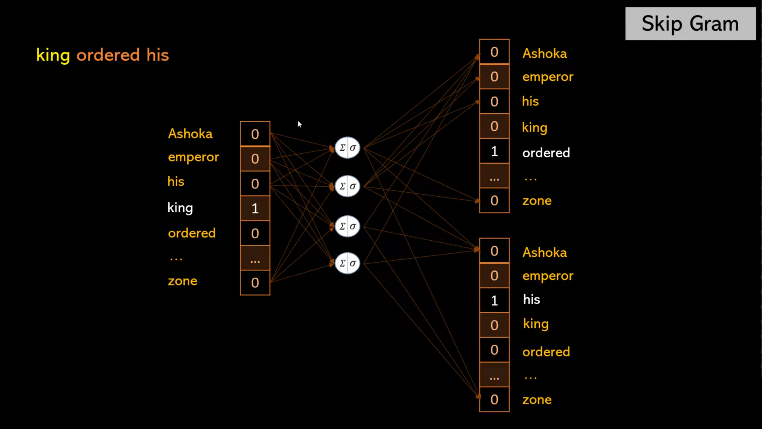)

![codebasics - What is Word2Vec A Simple Explanation Deep Learning Tutorial 41 (Tensorflow, Keras & Python) [hQwFeIupNP0 - 762x429 - 15m57s].png](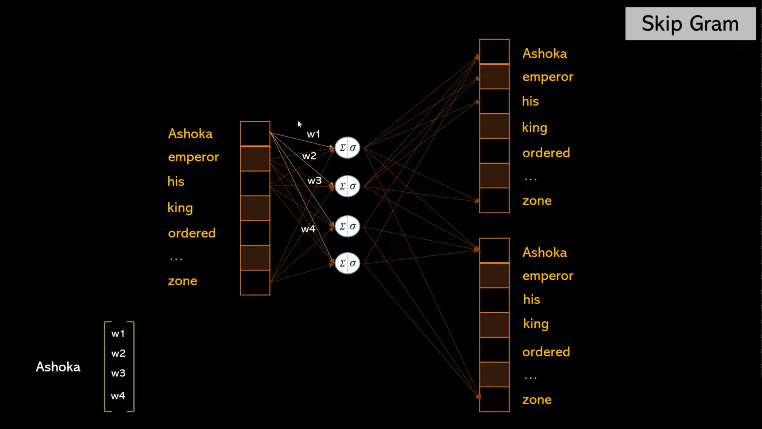)

![codebasics - What is Word2Vec A Simple Explanation Deep Learning Tutorial 41 (Tensorflow, Keras & Python) [hQwFeIupNP0 - 762x429 - 16m46s].png](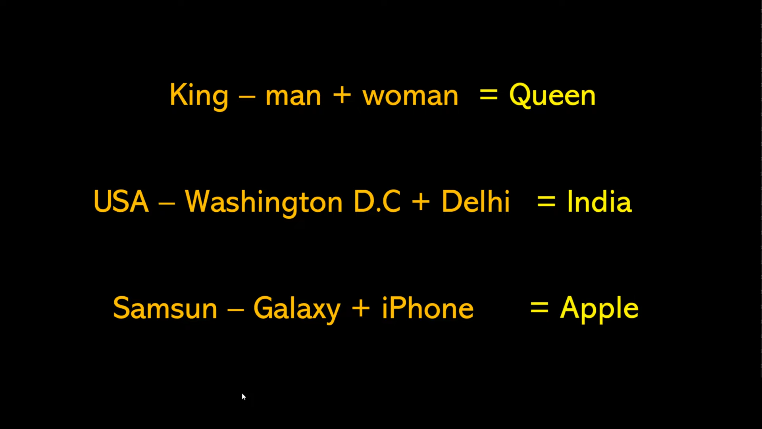)

![codebasics - What is Word2Vec A Simple Explanation Deep Learning Tutorial 41 (Tensorflow, Keras & Python) [hQwFeIupNP0 - 762x429 - 17m03s].png](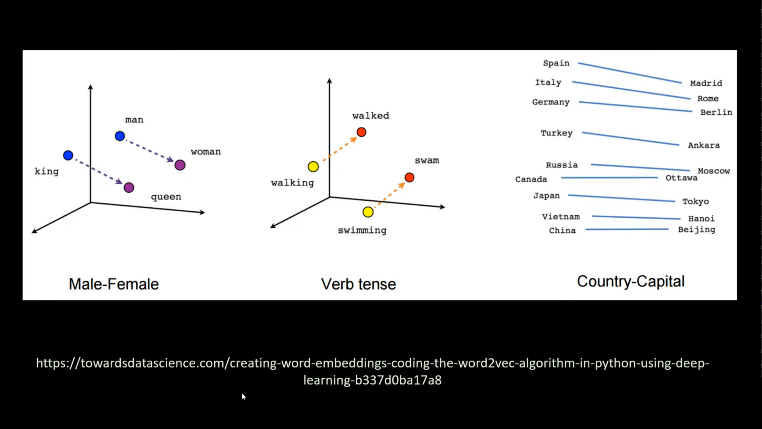)

**Word2vec coding implementation : training the model**

In [ ]:
!pip install gensim

In [ ]:
!pip install python-Levenshtein

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 39.1 MB/s eta 0:00:00


The `gensim` library and the `python-Levenshtein` library serve different purposes in the field of natural language processing (NLP) and string similarity, respectively.

1. **gensim:**
   - `gensim` is a Python library for topic modeling and document similarity analysis. It provides tools for working with large text corpora using unsupervised machine learning algorithms.
   - One of the main features of `gensim` is its implementation of algorithms like Latent Semantic Analysis (LSA) and Latent Dirichlet Allocation (LDA) for topic modeling.
   - It allows you to perform tasks such as document similarity, document clustering, and topic modeling.

   Example of using `gensim` for document similarity:(assume code as pseudo code, chalne ki jimmedari mai nhi leta)

   ```python
   from gensim.models import Word2Vec
   from gensim.similarities import doc2vec
   
   # Your text data
   documents = ["This is the first document.", "This document is the second document.", "And this is the third one."]
   
   # Tokenize the documents
   tokenized_docs = [doc.split() for doc in documents]
   
   # Train a Word2Vec model
   model = Word2Vec(tokenized_docs, min_count=1)
   
   # Create a similarity index
   index = doc2vec.Doc2Vec(model=model)
   
   # Calculate the similarity between two documents
   similarity = index.wv.n_similarity("first document".split(), "second document".split())
   print("Similarity:", similarity)
   ```

2. **python-Levenshtein:**
   - `python-Levenshtein` is a Python extension module that provides an efficient implementation of the Levenshtein distance algorithm.
   - The Levenshtein distance (also known as edit distance) measures the minimum number of single-character edits (insertions, deletions, or substitutions) required to change one word into another.
   - This library is commonly used in applications where string similarity or approximate string matching is important, such as spell checking, DNA sequence analysis, and fuzzy string matching.

   Example of using `python-Levenshtein` for calculating Levenshtein distance:

   ```python
   import Levenshtein
   
   # Calculate Levenshtein distance between two strings
   distance = Levenshtein.distance("kitten", "sitting")
   print("Levenshtein distance:", distance)
   ```

In summary, `gensim` is primarily used for topic modeling and document similarity analysis in NLP, while `python-Levenshtein` is used for calculating string similarity by measuring the Levenshtein distance between two strings.

In [ ]:
import Levenshtein

# Calculate Levenshtein distance between two strings
distance1 = Levenshtein.distance("kitten", "sitting")

distance2 = Levenshtein.distance("abcd", "sitting")

print("Levenshtein distance:", distance1, distance2) # more closeness in words = less distance

Levenshtein distance: 3 7


#Come bact to project Word2Vec now

In [ ]:
import gensim
import pandas as pd

**Reading and exploring the dataset:**

The dataset we are using here is a subset of Amazon reviews from the Cell phones and accessories category. The data is stored as a JSON file and can be read using pandas.

without lines = True, Value error : trailing data


The error ValueError: Trailing data

typically occurs when the JSON file contains multiple JSON objects, and pd.read_json() expects a single valid JSON object. To handle this situation, you can use the lines=True parameter in pd.read_json() to read the file as a JSON file with one JSON object per line. Each line is then treated as a separate JSON object.

In [ ]:
df = pd.read_json('/content/Cell_Phones_and_Accessories_5.json', lines=True)

In [ ]:
df.head()

reviewerID        asin      reviewerName helpful  \
0  A30TL5EWN6DFXT  120401325X         christina  [0, 0]   
1   ASY55RVNIL0UD  120401325X          emily l.  [0, 0]   
2  A2TMXE2AFO7ONB  120401325X             Erica  [0, 0]   
3   AWJ0WZQYMYFQ4  120401325X                JM  [4, 4]   
4   ATX7CZYFXI1KW  120401325X  patrice m rogoza  [2, 3]   

                                          reviewText  overall  \
0  They look good and stick good! I just don't li...        4   
1  These stickers work like the review says they ...        5   
2  These are awesome and make my phone look so st...        5   
3  Item arrived in great time and was in perfect ...        4   
4  awesome! stays on, and looks great. can be use...        5   

                                     summary  unixReviewTime   reviewTime  
0                                 Looks Good      1400630400  05 21, 2014  
1                      Really great product.      1389657600  01 14, 2014  
2                             LOVE LOVE LOVE      1403740800  06 26, 2014  
3                                      Cute!      1382313600  10 21, 2013  
4  leopard home button sticker for iphone 4s      1359849600   02 3, 2013

In [ ]:
df.shape

(194439, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194439 entries, 0 to 194438
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   reviewerID      194439 non-null  object
 1   asin            194439 non-null  object
 2   reviewerName    190920 non-null  object
 3   helpful         194439 non-null  object
 4   reviewText      194439 non-null  object
 5   overall         194439 non-null  int64 
 6   summary         194439 non-null  object
 7   unixReviewTime  194439 non-null  int64 
 8   reviewTime      194439 non-null  object
dtypes: int64(2), object(7)
memory usage: 13.4+ MB


Convertung word to vec, only review column

In [ ]:
df.reviewText[0]

"They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again"

In [ ]:
gensim.utils.simple_preprocess("They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again")

['they',
 'look',
 'good',
 'and',
 'stick',
 'good',
 'just',
 'don',
 'like',
 'the',
 'rounded',
 'shape',
 'because',
 'was',
 'always',
 'bumping',
 'it',
 'and',
 'siri',
 'kept',
 'popping',
 'up',
 'and',
 'it',
 'was',
 'irritating',
 'just',
 'won',
 'buy',
 'product',
 'like',
 'this',
 'again']

Tokenization is the process of breaking down a text or a sentence into individual units, called tokens. Tokens are the basic building blocks of text analysis and natural language processing. In the context of the `gensim` library, the `gensim.utils.simple_preprocess` function is a simple tokenization method provided to preprocess text data.

Here's what happens when you use `gensim.utils.simple_preprocess("string")`:

1. **Text Lowercasing:**
   - The input string is converted to lowercase. This is often done to ensure that the same word in different cases is treated as the same token.

2. **Tokenization:**
   - The lowercase string is then tokenized into a list of words. The default tokenization method used by `simple_preprocess` is to split the string into words based on whitespace.

3. **Filtering:**
   - The function filters out tokens that are too short (less than 2 characters) and too long (more than 15 characters) by default. These thresholds can be adjusted using the `min_len` and `max_len` parameters.

4. **Returning a List of Tokens:**
   - The function returns a list of tokens derived from the input string.

Here's an example:

```python
from gensim.utils import simple_preprocess

input_string = "This is a sample string for tokenization."
tokens = simple_preprocess(input_string)
print(tokens)
```

Output:
```
['this', 'is', 'sample', 'string', 'for', 'tokenization']
```

In this example, the input string is tokenized into a list of lowercase words. This kind of preprocessing is common before applying techniques like topic modeling or word embedding, where the text needs to be represented in a format suitable for analysis.

In [ ]:
review_test = df.reviewText.apply(gensim.utils.simple_preprocess) # to apply some function on any column or on full data frame of pandas dataframe, we use.apply() method
# on each 1,94,438 reviews pr it is applying the simple_preprocess function. And each sample pr preprocess lagane se aane vala result will be stored in one by one 1,94,438 lists. Ye sari lists will be stored in review_test nam ka pandas list

In [ ]:
review_test

0         [they, look, good, and, stick, good, just, don...
1         [these, stickers, work, like, the, review, say...
2         [these, are, awesome, and, make, my, phone, lo...
3         [item, arrived, in, great, time, and, was, in,...
4         [awesome, stays, on, and, looks, great, can, b...
                                ...                        
194434    [works, great, just, like, my, original, one, ...
194435    [great, product, great, packaging, high, quali...
194436    [this, is, great, cable, just, as, good, as, t...
194437    [really, like, it, becasue, it, works, well, w...
194438    [product, as, described, have, wasted, lot, of...
Name: reviewText, Length: 194439, dtype: object

In [ ]:
review_text = review_test # upar name thoda galat ho gya tha, instead of running the code again, better to make a copy

In [ ]:
type(review_text) # pandas series.

pandas.core.series.Series

In [ ]:
review_text.size

194439

In [ ]:
review_test.shape # = list

(194439,)

In [ ]:
review_text.loc[0]

['they',
 'look',
 'good',
 'and',
 'stick',
 'good',
 'just',
 'don',
 'like',
 'the',
 'rounded',
 'shape',
 'because',
 'was',
 'always',
 'bumping',
 'it',
 'and',
 'siri',
 'kept',
 'popping',
 'up',
 'and',
 'it',
 'was',
 'irritating',
 'just',
 'won',
 'buy',
 'product',
 'like',
 'this',
 'again']

In [ ]:
df.reviewText.loc[0]

"They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again"

Training the Word2Vec Model.

When you have paragraph of texts, you can generate training samples from the paragraph.

Train the model for reviews. Use a window of size 10 i.e. 10 words before the present word(i.e. target word) and 10 words ahead. A sentence with at least 2 words should only be considered, configure this using min_count parameter.

Workers define how many CPU threads to be used.

**Initialize the model**

In [ ]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2,
    workers=4  # number of cpu's to be used
)

 the Word2Vec model in Gensim doesn't directly support GPU or TPU acceleration. It typically relies on CPU parallelization (workers parameter) for training.

**Build Vocabulary**

In [ ]:
model.build_vocab(review_test, progress_per=1000)
# "progress_per" indicates how many words to process before showing/updating the progress
# jupyter and colab ki limitation ki vajah se progress nhi dikha

**Train the Word2Vec Model**

In [ ]:
model.train(review_text,total_examples=model.corpus_count, epochs = model.epochs)

(61505221, 83868975)

Oh nice done earlier than expected, I thought it may take one - two days as 2 lakhs sentences each me 10 10 ki window banakr train krna. But it has been done in 2 min only

**Save the Model**


Save the model so that it can be reused in other applications

In [ ]:
model.save("./word2vec_amazon.model")

Go in file section of colab and download the file, and enjoy the model for deployement etc purpose. It is itself 28mb huge model

**Experiments : most similar**

Words similar to bad

In [ ]:
model.wv.most_similar("bad")

[('terrible', 0.6768016815185547),
 ('shabby', 0.6254274845123291),
 ('horrible', 0.6072826981544495),
 ('good', 0.5988421440124512),
 ('awful', 0.5819439888000488),
 ('okay', 0.5580956935882568),
 ('legit', 0.5474327206611633),
 ('poor', 0.5379226803779602),
 ('sad', 0.5295782089233398),
 ('ok', 0.5249589681625366)]

Not very perfect, but see the power of the model. It has started understanding the words. It knows which words are similar to bad. This is because of the correlation and values similarities of features of similar words.

In [ ]:
# similarity scores between two words

model.wv.similarity(w1="cheap",w2="inexpensive")

0.54766494

In [ ]:
model.wv.similarity(w1="great",w2="good")

0.77183807

In [ ]:
model.wv.similarity(w1="great",w2="product")

-0.046995237

Working so accurate